In [81]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import ensemble, svm
from sklearn.metrics import classification_report, confusion_matrix
import time

In [19]:
lfw = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.4)

In [30]:
lfw.data.shape

(1140, 1850)

In [29]:
lfw.images.shape

(1140, 50, 37)

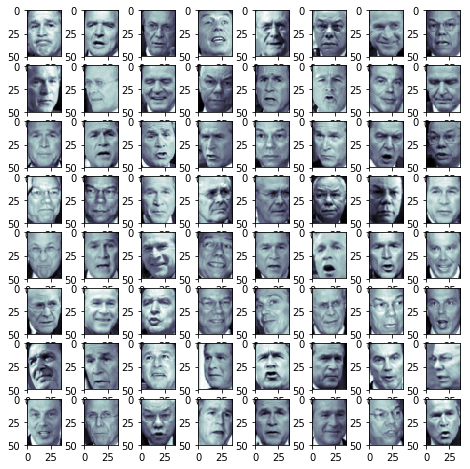

In [28]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i], cmap= plt.cm.bone)
plt.show()

In [18]:
x = lfw.data
y = lfw.target
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0)

In [43]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [44]:
pca.components_.shape
# pca.explained_variance_.shape

(855, 1850)

In [46]:
k=0
covariencetaken=0
total = pca.explained_variance_.sum()
while covariencetaken/total <0.99:
    covariencetaken += pca.explained_variance_[k]
    k +=1
k

316

In [50]:
pca = PCA(n_components=k, whiten=True)
transfromed_x = pca.fit_transform(X_train)
transfromed_x.shape

(855, 316)

In [51]:
approx_x = pca.inverse_transform(transfromed_x)
approx_x.shape
approx_images = approx_x.reshape((855,50,37))

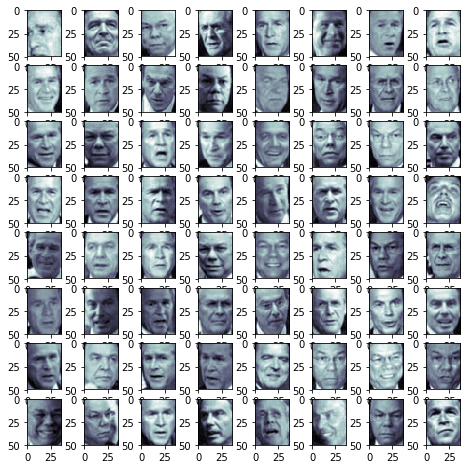

In [52]:
fig2 = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig2.add_subplot(8,8,i+1)
    ax.imshow(approx_images[i], cmap= plt.cm.bone)
plt.show()

In [54]:
eigenv = pca.components_
eigenv.shape
eigenfaces = eigenv.reshape((316,50,37))

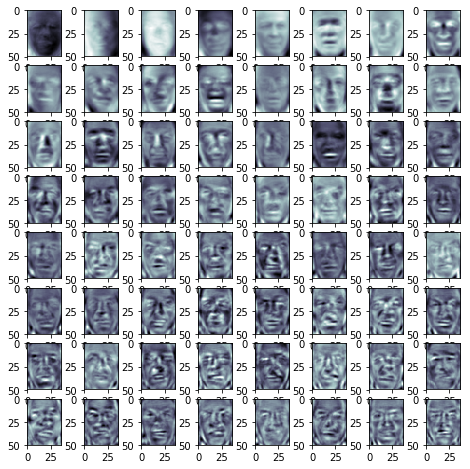

In [56]:
fig2 = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig2.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i], cmap= plt.cm.bone)
plt.show()

In [74]:
x_train_pca = transfromed_x
x_test_pca = pca.transform(X_test)

In [84]:
rf = svm.SVC()
start = time.time()
rf.fit(X_train,Y_train)
print(time.time() - start)
Y_pred = rf.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test, Y_pred))

3.6518547534942627
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        61
          1       0.00      0.00      0.00        36
          2       0.43      1.00      0.60       122
          3       0.00      0.00      0.00        31
          4       0.00      0.00      0.00        35

avg / total       0.18      0.43      0.26       285

[[  0   0  61   0   0]
 [  0   0  36   0   0]
 [  0   0 122   0   0]
 [  0   0  31   0   0]
 [  0   0  35   0   0]]


C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [82]:
rf = svm.SVC()
start = time.time()
rf.fit(x_train_pca,Y_train)
print(time.time() - start)
Y_pred = rf.predict(x_test_pca)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.8434641361236572
             precision    recall  f1-score   support

          0       0.93      0.69      0.79        61
          1       1.00      0.08      0.15        36
          2       0.53      0.99      0.69       122
          3       1.00      0.06      0.12        31
          4       1.00      0.20      0.33        35

avg / total       0.78      0.61      0.54       285

[[ 42   0  19   0   0]
 [  0   3  33   0   0]
 [  1   0 121   0   0]
 [  1   0  28   2   0]
 [  1   0  27   0   7]]
